In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions import read_data, load_additional_data

In [16]:
import glob
folder_path = "Additional Data/*.csv"
files = glob.glob(folder_path)
data_df = read_data()
data_df = load_additional_data(data_df, files)
diff_df = data_df.diff().dropna()

Additional Data\Auto Inventory Sales Ratio - SA.csv
Additional Data\CUSR0000SETA02.csv
Additional Data\CUUR0000SETA01.csv
Additional Data\DAUTOSA (1).csv
Additional Data\Domestic Auto Production - SA.csv
Additional Data\Domestic Auto Sales- SAAR.csv
Additional Data\FEDFUNDS.csv
Additional Data\Foreign Auto Sales - SA.csv
Additional Data\Manufacturers New Order Vehicles and Parts - SA.csv
Additional Data\Natural Gas Consumption - SA.csv
Additional Data\Natural Gas Conventional Price.csv
Additional Data\Public Transit Ridership.csv
Additional Data\TERMCBAUTO48NS.csv
Additional Data\UMCSENT.csv
Additional Data\Vehicle Miles Traveled.csv


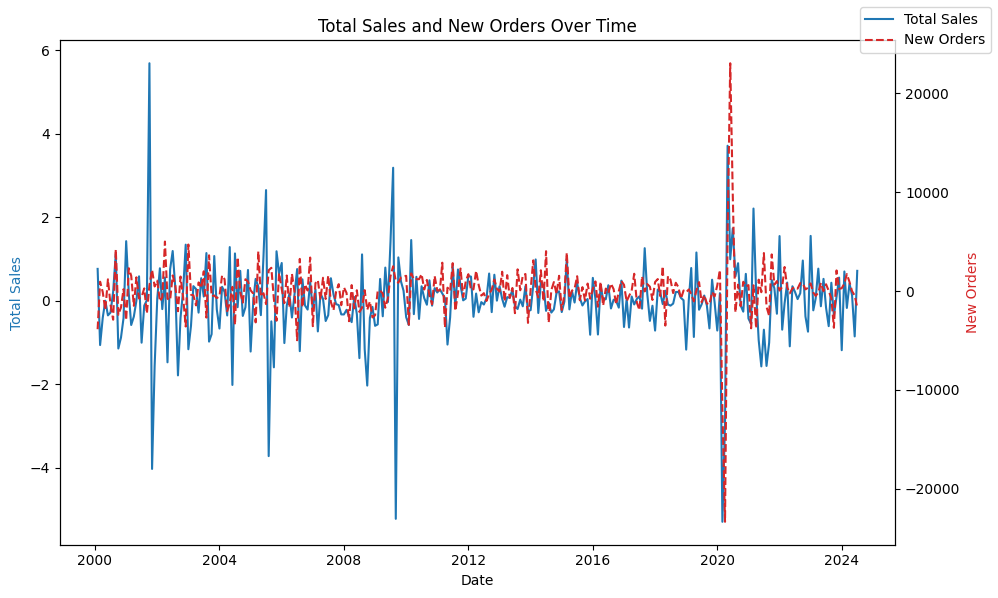

In [17]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-axis (Total Sales) ---
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(diff_df.index, diff_df['Total Sales'], color=color, label='Total Sales')


# --- Right Y-axis (New Orders) ---
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('New Orders', color=color)
ax2.plot(diff_df.index, diff_df['New Orders'], color=color, linestyle='--', label='New Orders')


plt.title('Total Sales and New Orders Over Time')
fig.tight_layout()
fig.legend()
plt.show()


Additional Data

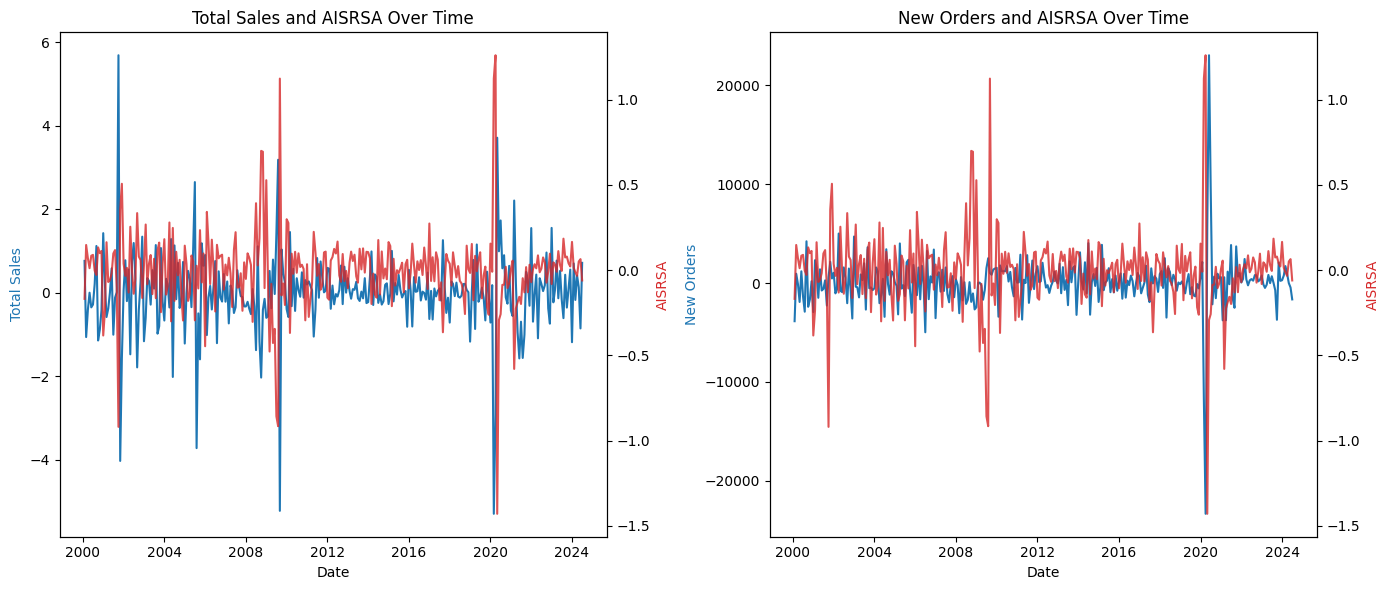

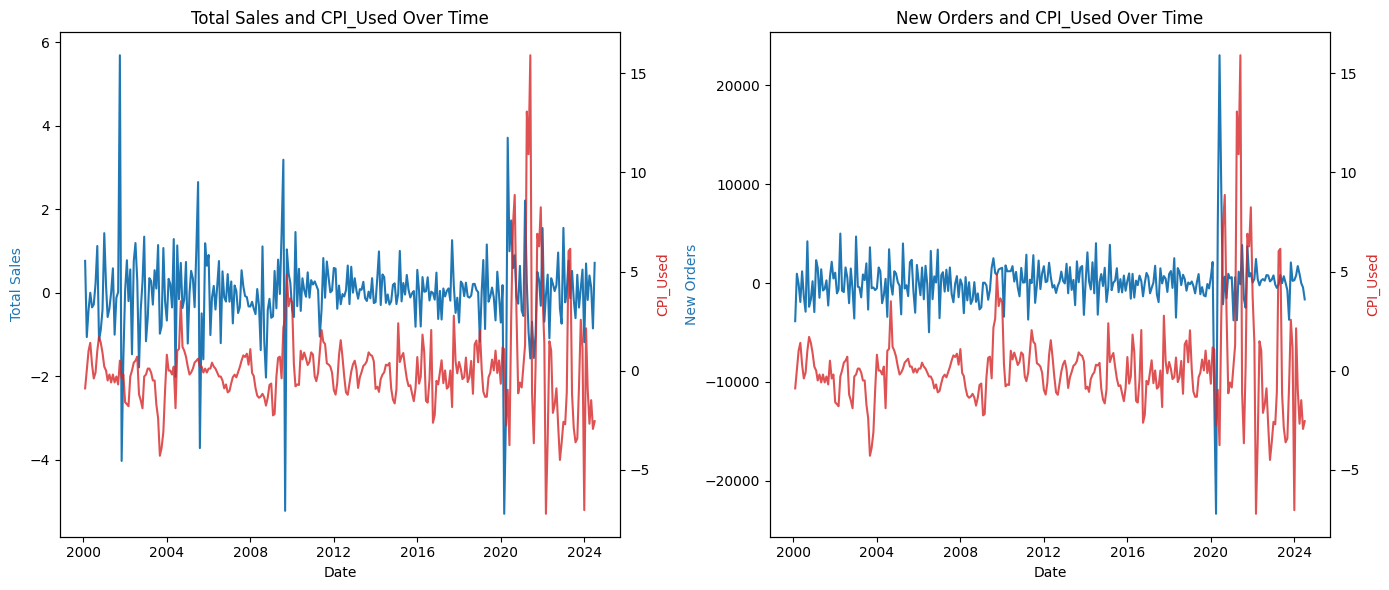

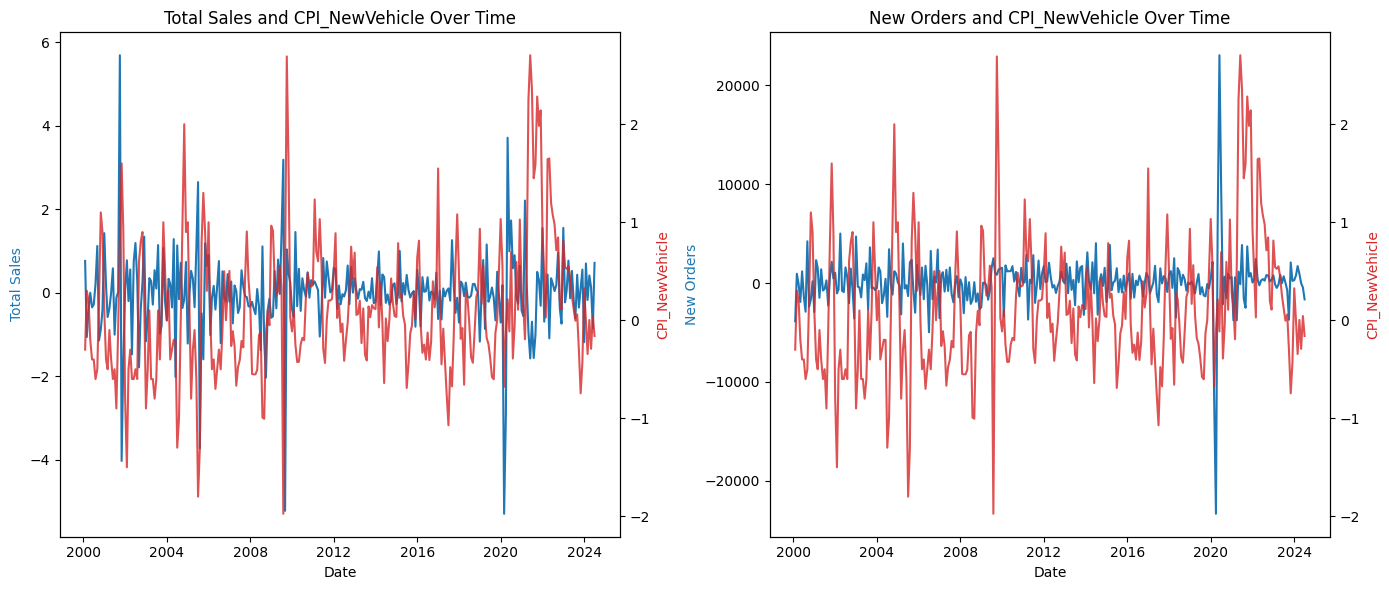

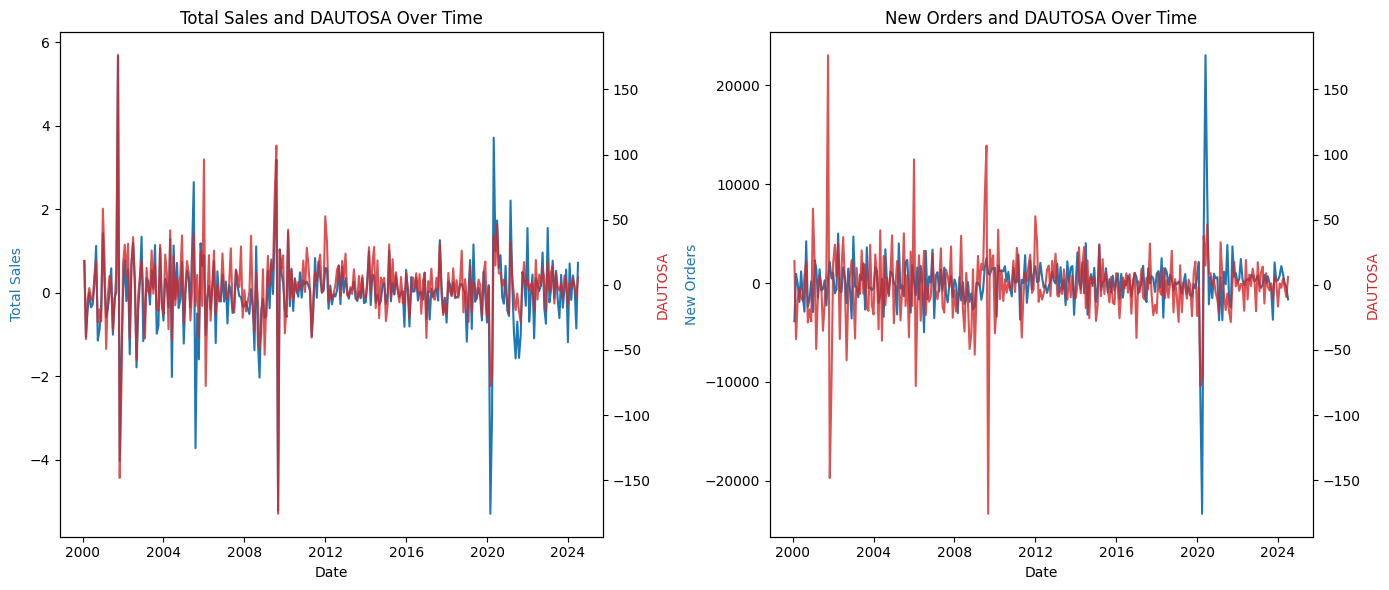

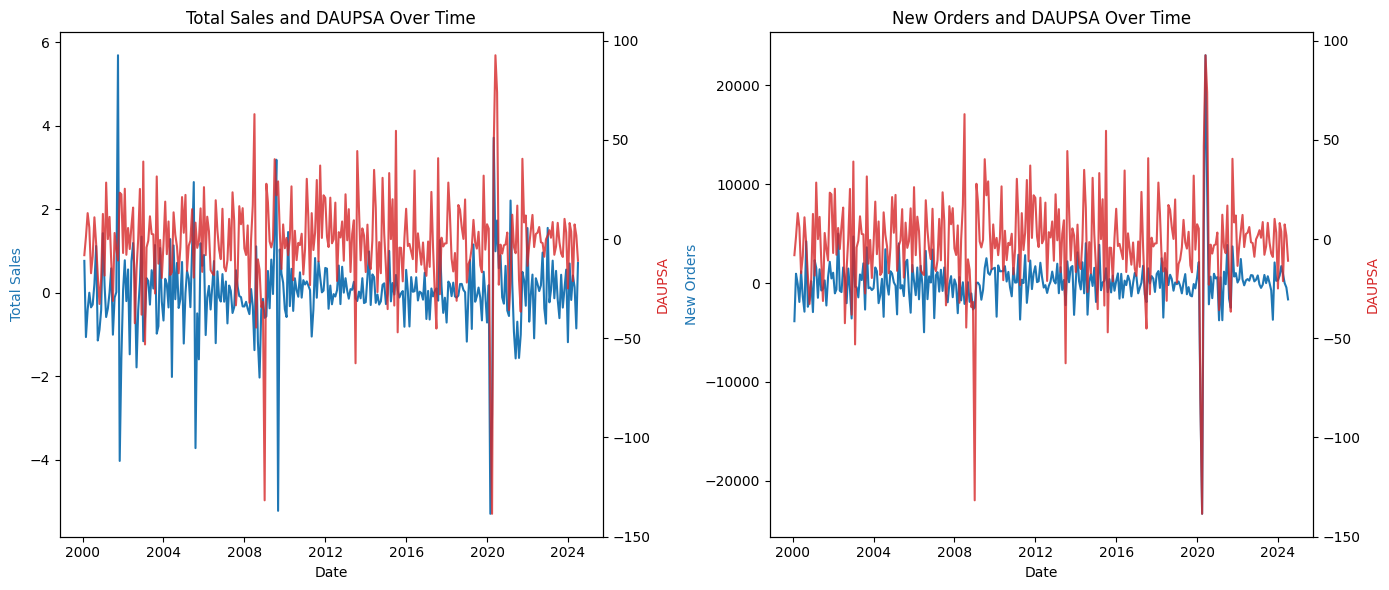

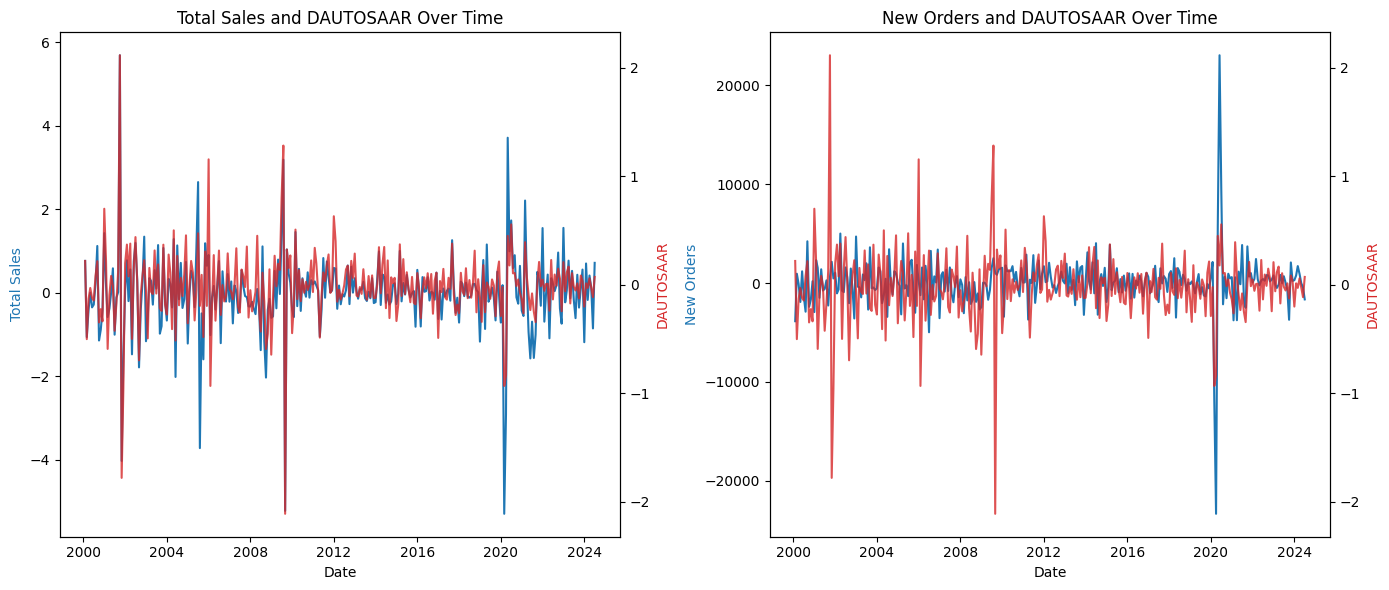

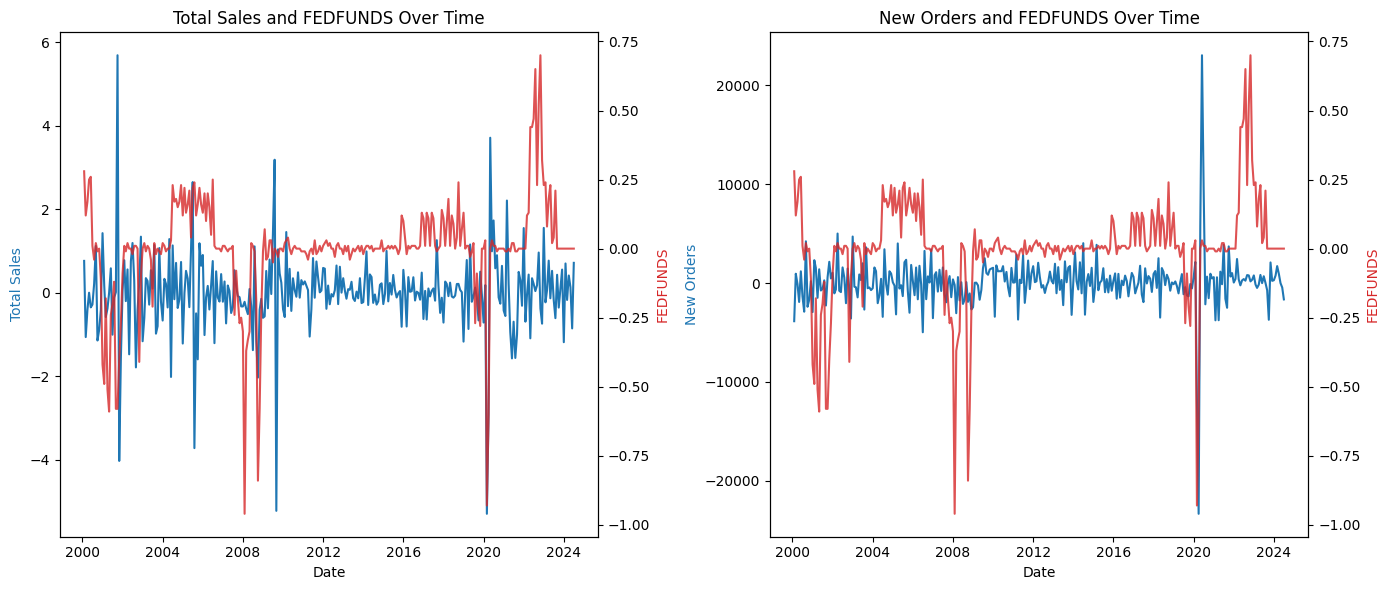

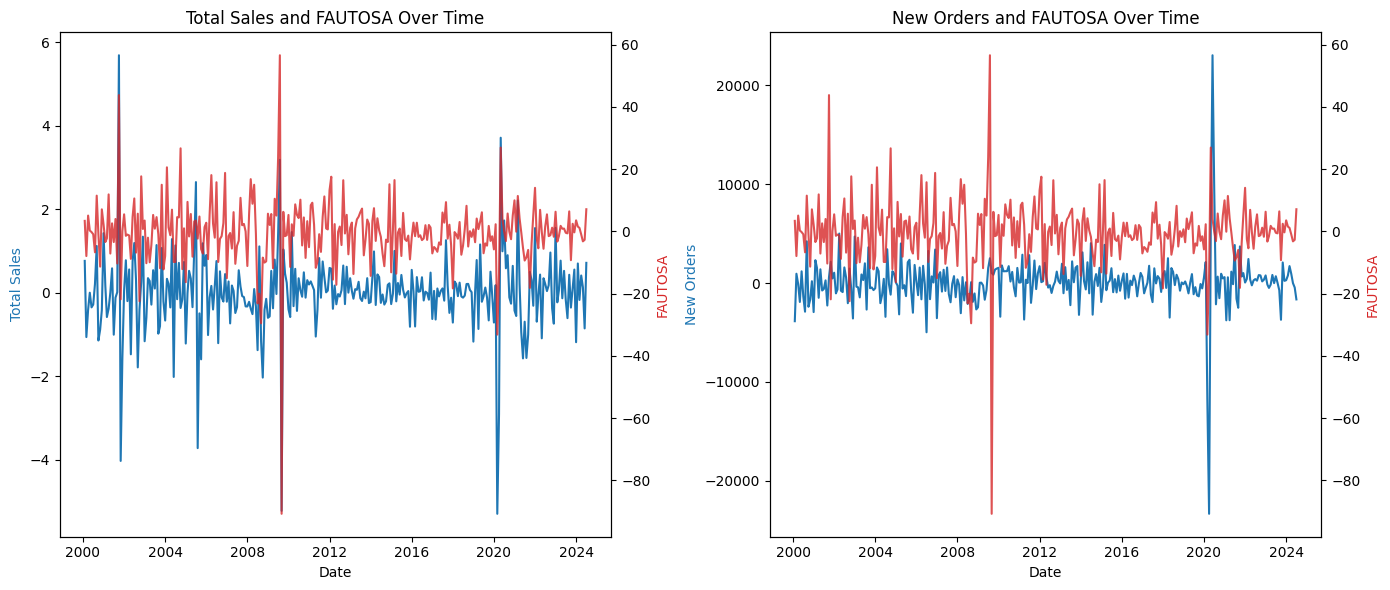

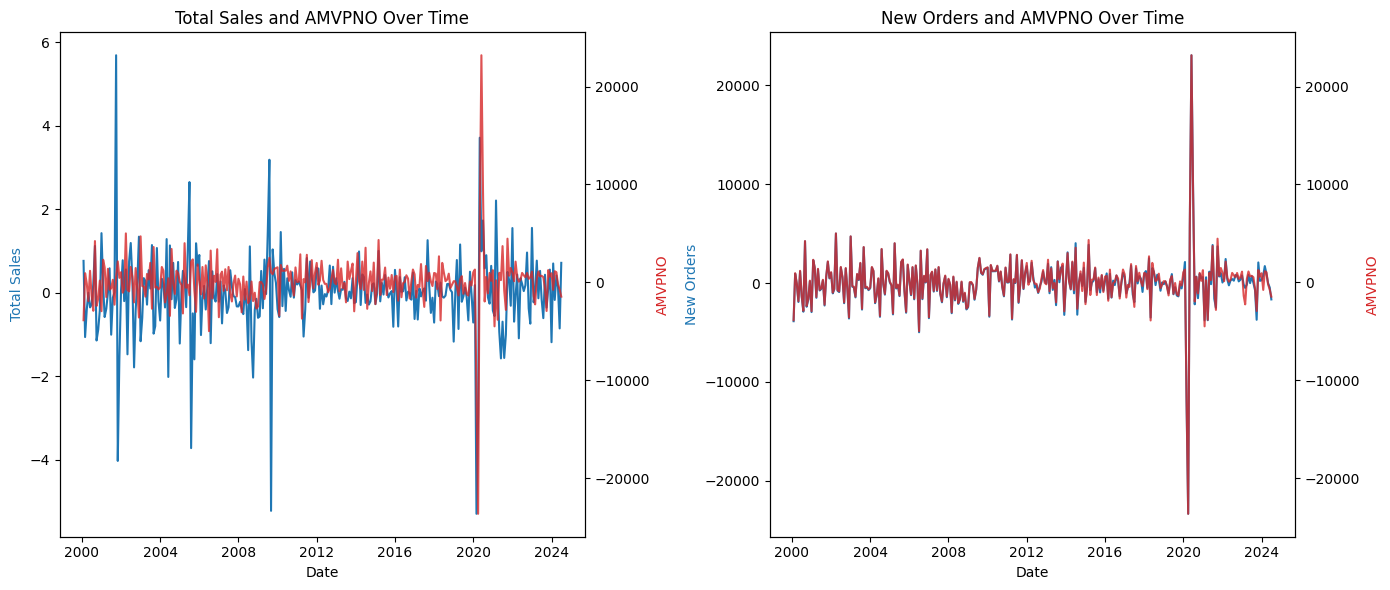

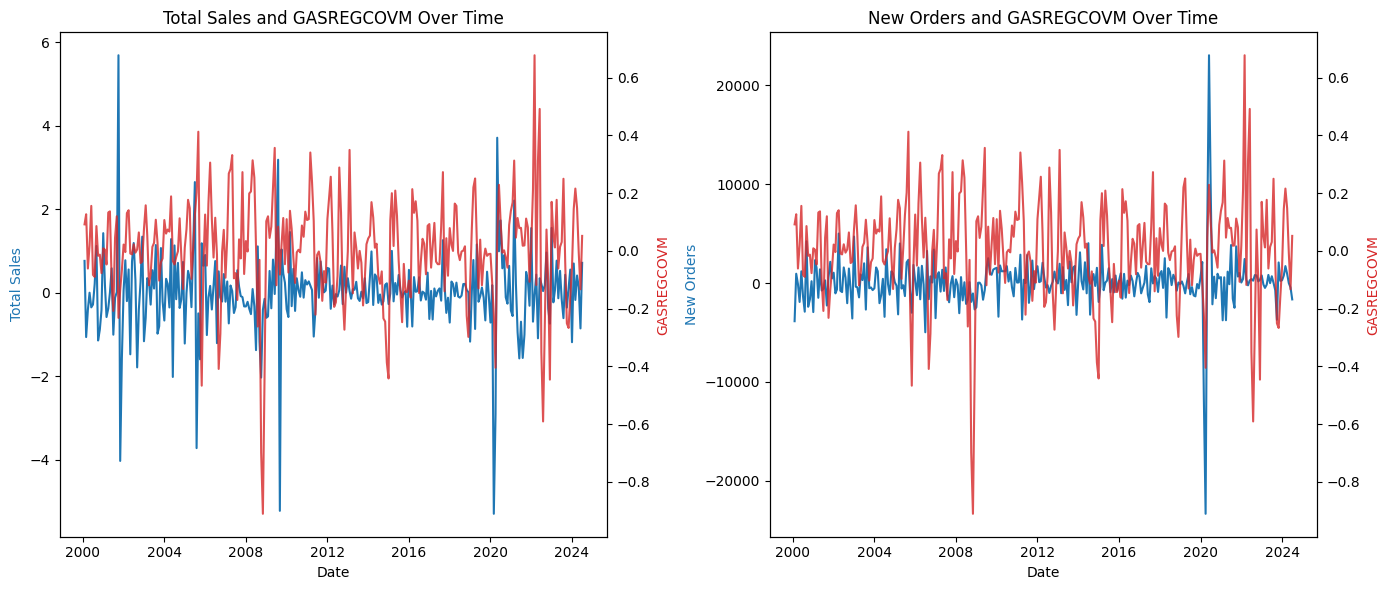

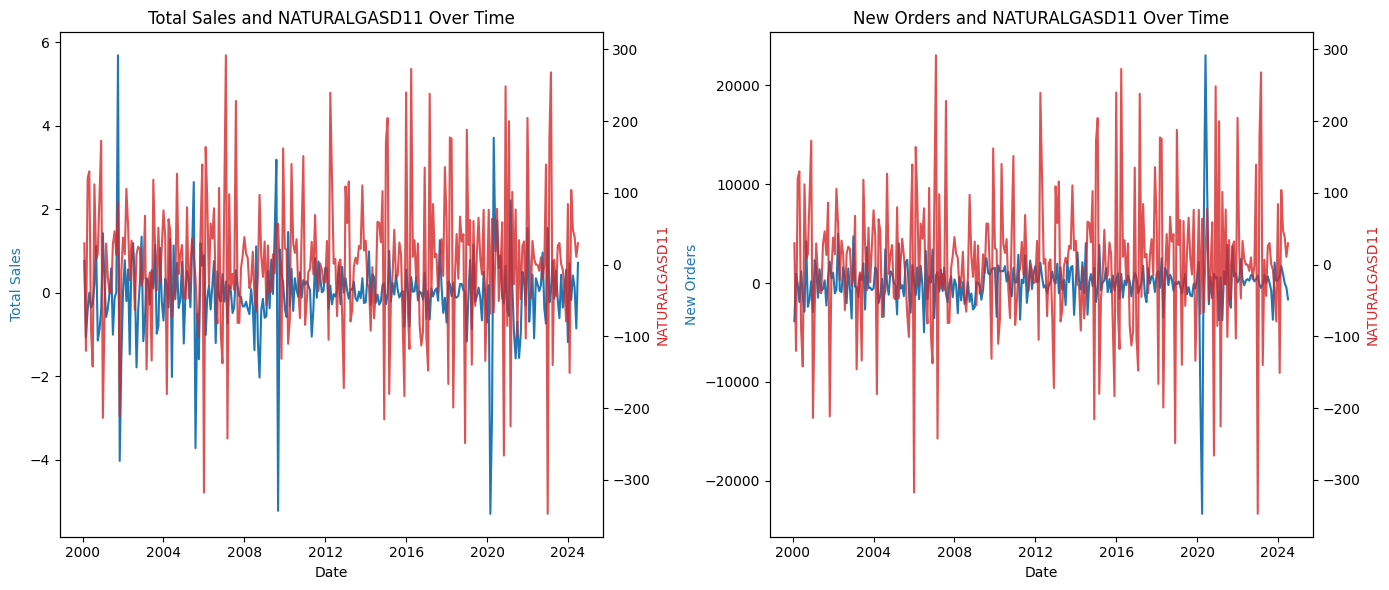

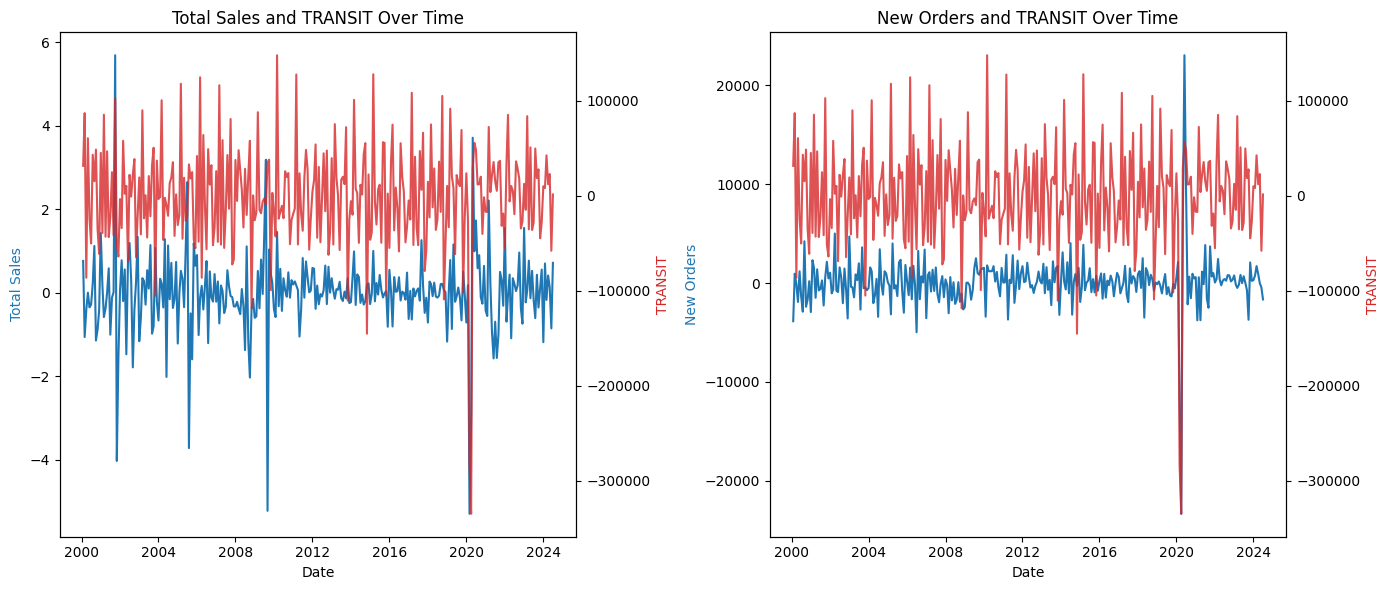

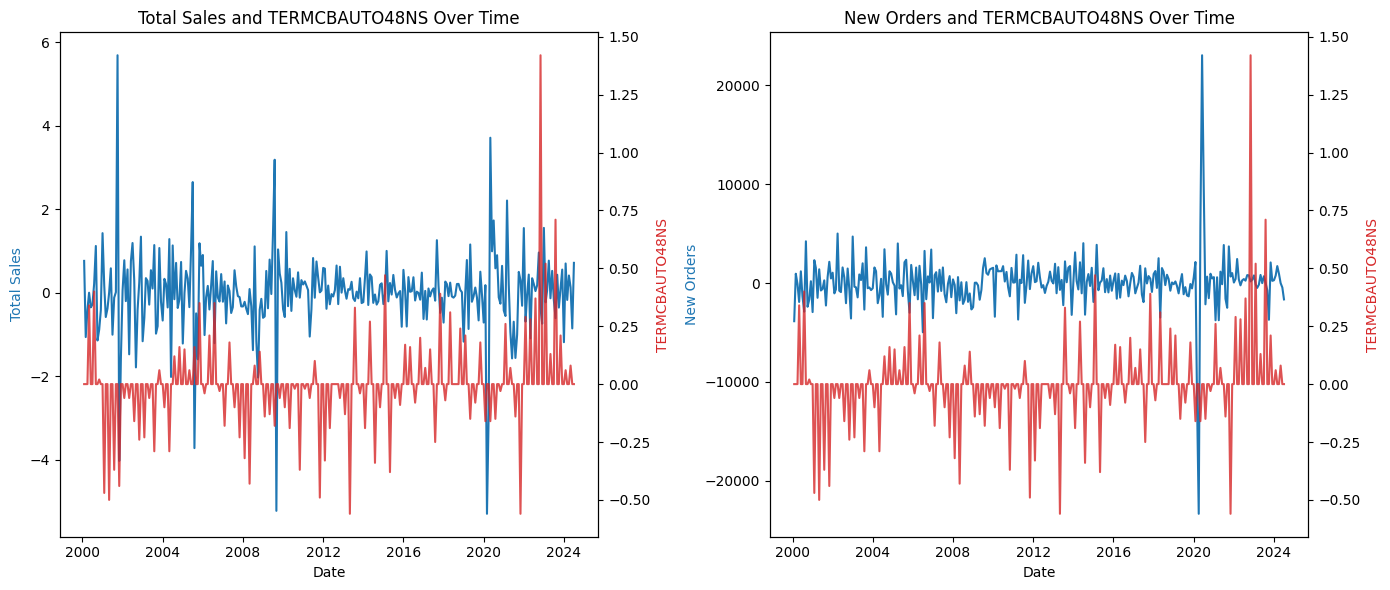

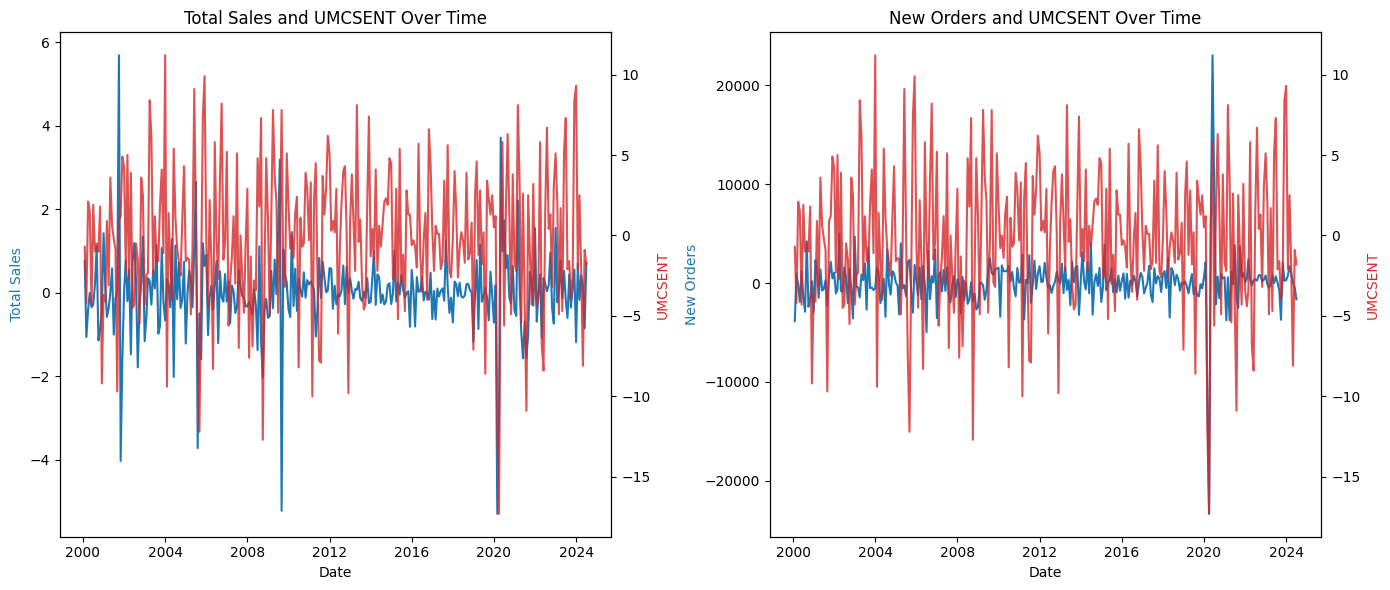

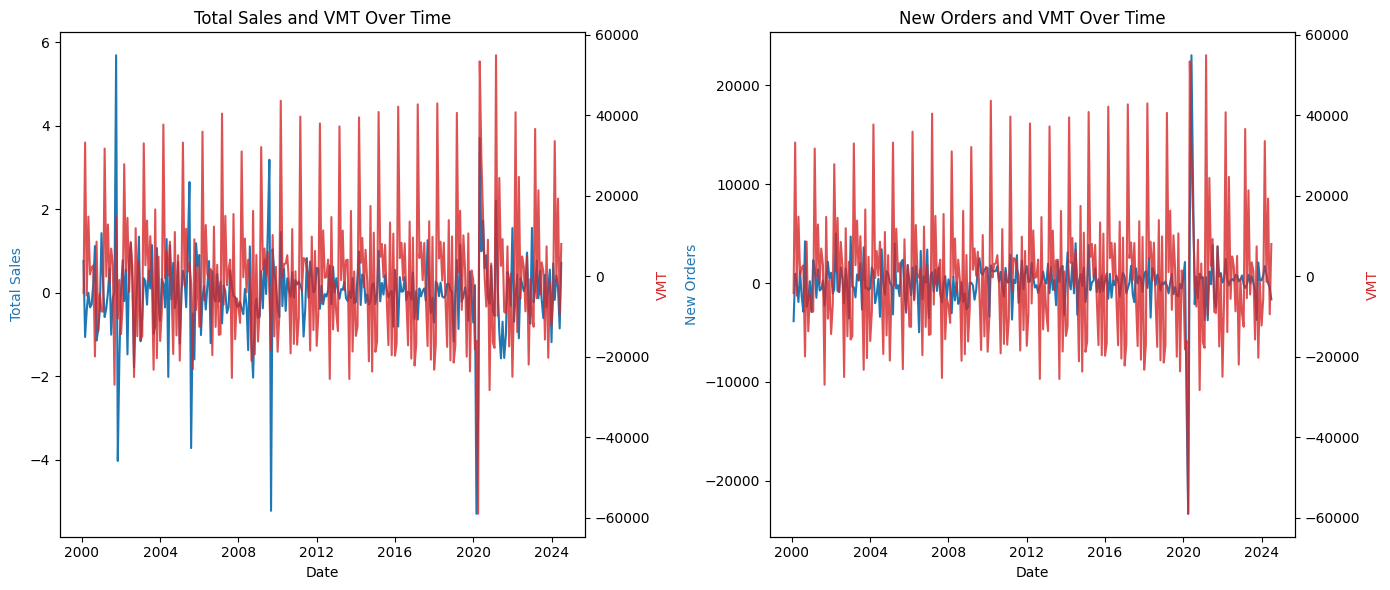

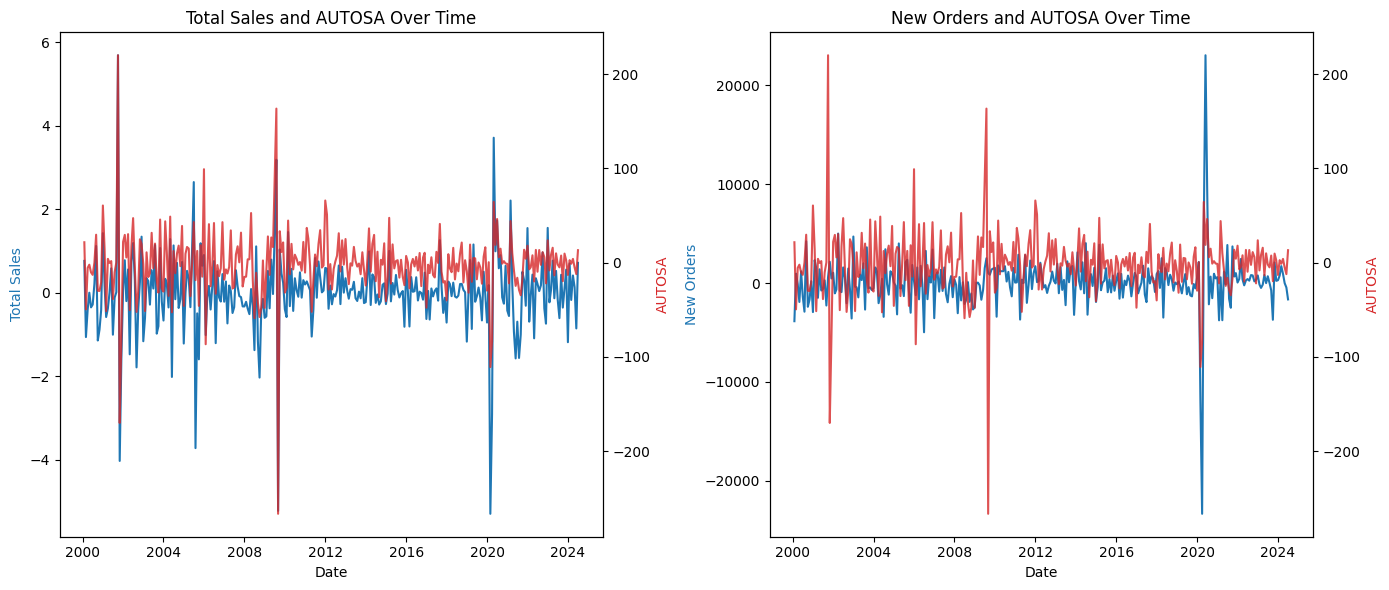

In [11]:
for col in list(diff_df.columns)[2:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # --- Subplot 1: Total Sales ---
    ax1 = axes[0]

    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(diff_df.index, diff_df['Total Sales'], color=color, label='Total Sales')

    # Right Y-axis (quantity_col)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(col, color=color)
    ax2.plot(diff_df.index, diff_df[col], color=color, alpha=0.8, label=col)
    ax1.set_title(f'Total Sales and {col} Over Time')

    # --- Subplot 2: New Orders ---
    ax3 = axes[1]

    
    # Left Y-axis (New Orders)
    color = 'tab:blue'
    ax3.set_xlabel('Date')
    ax3.set_ylabel('New Orders', color=color)
    ax3.plot(diff_df.index, diff_df['New Orders'], color=color, label='New Orders')

    # Right Y-axis (quantity_col)
    ax4 = ax3.twinx()
    color = 'tab:red'
    ax4.set_ylabel(col, color=color)
    ax4.plot(diff_df.index, diff_df[col], color=color, alpha=0.8, label=col)
    ax3.set_title(f'New Orders and {col} Over Time')

    # Adjust layout and add legend
    fig.tight_layout()
    plt.show()

